In [1]:
import torch
from torchvision import datasets, transforms

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('dataset/',train=True,download=True,
                   transform = transforms.Compose([
                                                   transforms.ToTensor()
                   ])),
                   batch_size=1
                   #shuffle = True
)

Extracting dataset/MNIST/raw/train-images-idx3-ubyte.gz to dataset/MNIST/raw


Extracting dataset/MNIST/raw/train-labels-idx1-ubyte.gz to dataset/MNIST/raw


Extracting dataset/MNIST/raw/t10k-images-idx3-ubyte.gz to dataset/MNIST/raw


Extracting dataset/MNIST/raw/t10k-labels-idx1-ubyte.gz to dataset/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


In [4]:
image, label = next(iter(train_loader))

In [5]:
image.shape, label.shape#batch channel height width

(torch.Size([1, 1, 28, 28]), torch.Size([1]))

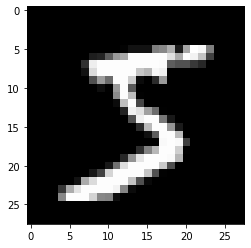

In [6]:
plt.imshow(image[0,0,:,:],'gray')
plt.show()

In [7]:
import torch.nn as nn #weight있고
import torch.nn.functional as F #weight없고

#Convolution



*   in_channels 받을 channel의 개수
*   out_channels 보낼 channel의 개수 conv에 의해 생성된 값의 수 == 필터개수
*   kernel_size 만들 kernel(weight)의 사이즈 filter랑 같다



In [8]:
nn.Conv2d(in_channels=1,out_channels=1,kernel_size=5,stride=1)

Conv2d(1, 1, kernel_size=(5, 5), stride=(1, 1))

In [9]:
layer = nn.Conv2d(1,20,5,1).to(torch.device('cuda'))
layer

Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))

In [10]:
weight = layer.weight#5by5사이즈의 필터들이 나온다. 20개
weight

Parameter containing:
tensor([[[[ 0.1010,  0.1931,  0.1547,  0.1761,  0.0861],
          [-0.1845,  0.1369, -0.0060,  0.1052,  0.1806],
          [ 0.0900,  0.0488,  0.0619, -0.0696, -0.0456],
          [-0.1070, -0.0822, -0.1904, -0.0341,  0.1620],
          [ 0.1818,  0.1972, -0.1749,  0.1979, -0.1584]]],


        [[[-0.1632, -0.0566,  0.0564, -0.1645,  0.1428],
          [-0.1421,  0.1677,  0.0311, -0.0589,  0.0326],
          [-0.1725,  0.0945,  0.0840, -0.1621,  0.0154],
          [ 0.0352,  0.1731, -0.1879,  0.1623, -0.1556],
          [-0.0570,  0.1391, -0.1725,  0.0802,  0.0557]]],


        [[[-0.0144,  0.0448,  0.1768, -0.1585, -0.0980],
          [ 0.0130, -0.0641,  0.0323, -0.0325, -0.0017],
          [-0.0943, -0.0374,  0.0549, -0.0205,  0.1297],
          [-0.1169,  0.1768, -0.1733, -0.0457,  0.0727],
          [ 0.0294, -0.0615,  0.1630,  0.1270, -0.1192]]],


        [[[-0.0202,  0.0808, -0.0927, -0.0806, -0.0020],
          [-0.0815,  0.1113, -0.0817,  0.1372,  0.0683

In [11]:
weight = weight.cpu().detach().numpy()#detach를 해야 numpy화 가능 , cpu붙여줘야 cpu로감

In [12]:
weight.shape

(20, 1, 5, 5)

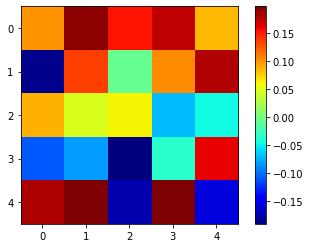

In [13]:
plt.imshow(weight[0,0,:,:],'jet')
plt.colorbar()
plt.show()

In [14]:
#output시각화를 위해 numpy화
output_data = layer(image.cuda())

In [15]:
output_data = output_data.data

In [16]:
output = output_data.cpu().numpy()

In [17]:
output.shape

(1, 20, 24, 24)

In [18]:
#input꺼
image_arr = image.numpy()
image_arr.shape

(1, 1, 28, 28)

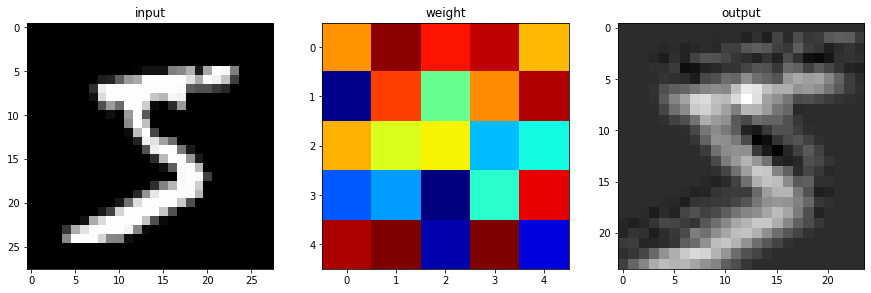

In [19]:
plt.figure(figsize=(15,20))
plt.subplot(131)
plt.title('input')
plt.imshow(np.squeeze(image_arr),'gray')
plt.subplot(132)
plt.title('weight')
plt.imshow(weight[0,0,:,:],'jet')
plt.subplot(133)
plt.title('output')
plt.imshow(output[0,0,:,:],'gray')
plt.show()

In [20]:
image.shape

torch.Size([1, 1, 28, 28])

In [21]:
pool = F.max_pool2d(image,2,2)
pool.shape

torch.Size([1, 1, 14, 14])

In [22]:
#weight가 없어서 numpy()가능
pool_arr = pool.numpy()
pool_arr.shape

(1, 1, 14, 14)

In [23]:
image_arr.shape

(1, 1, 28, 28)

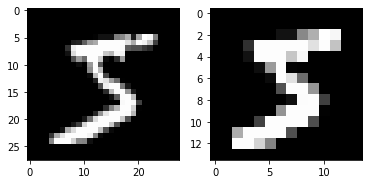

In [24]:
plt.subplot(121)
plt.imshow(np.squeeze(image_arr),'gray')
plt.subplot(122)
plt.imshow(np.squeeze(pool_arr),'gray')
plt.show()

In [25]:
#flatten
flatten = image.view(1,28*28)#batch_size, 나머지
flatten.shape

torch.Size([1, 784])

In [26]:
lin = nn.Linear(28*28,10)(flatten)#784개를 받아서 10개로 내보낸다.
lin.shape

torch.Size([1, 10])

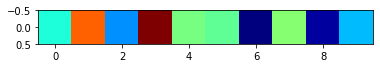

In [27]:
plt.imshow(lin.detach().numpy(),'jet')
plt.show()

In [28]:
#softmax
with torch.no_grad():#이러면 weight무시, detach안해도됨
  flatten = image.view(1,28*28)
  lin = nn.Linear(784,10)(flatten)
  softmax = F.softmax(lin, dim =1)

In [29]:
softmax

tensor([[0.0934, 0.1201, 0.1358, 0.1036, 0.0994, 0.1116, 0.0905, 0.0740, 0.0857,
         0.0857]])

In [30]:
np.sum(softmax.numpy())

1.0

In [46]:
class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()#생성자 실행순서 알맞게 해줌
    self.conv1 = nn.Conv2d(1,20,5,1)#(in,out,filter,stride)
    self.conv2 = nn.Conv2d(20,50,5,1)
    self.fc1 = nn.Linear(4*4*50,500)#왜 4*4*50일까 print해보면 암.pooling해서
    self.fc2 = nn.Linear(500,10)
  def forward(self,x):
    #feature extraction
    x = F.relu(self.conv1(x))
    x = F.max_pool2d(x,2,2)
    x = F.relu(self.conv2(x))
    x = F.max_pool2d(x,2,2)

    #print(x.shape)
    #fully connected
    x = x.view(-1,4*4*50)#flatten
    x = F.relu(self.fc1(x))
    x = self.fc2(x)
    return F.log_softmax(x, dim = 1)

In [47]:
model = Net()

In [48]:
result = model.forward(image)

In [49]:
result

tensor([[-2.2820, -2.3004, -2.4353, -2.3151, -2.4330, -2.2527, -2.2395, -2.2130,
         -2.3077, -2.2719]], grad_fn=<LogSoftmaxBackward>)